# Data Loading

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.shape

(6435, 8)

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Observations:
    * date is in Object data type, need to change it to date formar for correct data analysis

In [7]:
#Converting date into correct date and time format

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df['date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
date    6435 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [11]:
#checking that the datetime col is formatted correctly and applying datetie methods
df.loc[1,'date'].day_name()

'Friday'

In [12]:
# create a list of our conditions
conditions = [
    (df['Date'] == '12-02-2010') | (df['Date'] == "11-02-2011") | (df['Date'] == "10-02-2012") | (df['Date'] == "08-02-2013"),
    (df['Date'] == '10-09-2010') | (df['Date'] == "09-09-2011") | (df['Date'] == "07-09-2012") | (df['Date'] == "06-09-2013"),
    (df['Date'] == '26-11-2010') | (df['Date'] == "25-11-2011") | (df['Date'] == "23-11-2012") | (df['Date'] == "29-11-2013"),
    (df['Date'] == '31-12-2010') | (df['Date'] == "30-12-2011") | (df['Date'] == "28-12-2012") | (df['Date'] == "27-12-2013"),
    
    (df['Date'] != '12-02-2010') | (df['Date'] != "11-02-2011") | (df['Date'] != "10-02-2012") | (df['Date'] != "08-02-2013"),
    (df['Date'] != '10-09-2010') | (df['Date'] != "09-09-2011") | (df['Date'] != "07-09-2012") | (df['Date'] != "06-09-2013"),
    (df['Date'] != '26-11-2010') | (df['Date'] != "25-11-2011") | (df['Date'] != "23-11-2012") | (df['Date'] != "29-11-2013"),
    (df['Date'] != '31-12-2010') | (df['Date'] != "30-12-2011") | (df['Date'] != "28-12-2012") | (df['Date'] != "27-12-2013")
    
    ]

# create a list of the values we want to assign for each condition
values = ['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas','Non Holiday Week','Non Holiday Week','Non Holiday Week','Non Holiday Week']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Holiday_category'] = np.select(conditions, values)

# display updated DataFrame
df.head()
#df.to_csv('dfwalmart.csv')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Holiday_category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,Non Holiday Week
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,Non Holiday Week
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,Non Holiday Week
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,Non Holiday Week


In [13]:
df['Weekly_Sales($M)'] = df['Weekly_Sales']/1000000
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Quarter'] = df['date'].dt.quarter

In [14]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Holiday_category,Weekly_Sales($M),Year,Month,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,Non Holiday Week,1.643691,2010,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,Super Bowl,1.641957,2010,2,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,Non Holiday Week,1.611968,2010,2,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,Non Holiday Week,1.409728,2010,2,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,Non Holiday Week,1.554807,2010,3,1


# Which store has maximum sales

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

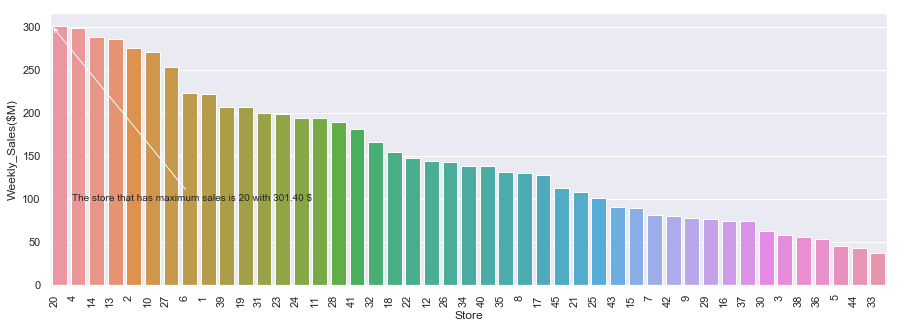

Store with Maximum Sales all years
   Store  Weekly_Sales($M)
0     20            301.40
Store with Minimum Sales all years
    Store  Weekly_Sales($M)
44     33             37.16


In [16]:
# Overall Sales
pd.options.display.float_format = '{:,.2f}'.format
df_max_sales=df.groupby(['Store'])[['Weekly_Sales($M)']].sum().sort_values('Weekly_Sales($M)',ascending=False).reset_index()


fig, axs = plt.subplots(figsize=(15,5))

ax0=sns.barplot(x='Store',y='Weekly_Sales($M)',data = df_max_sales,
           order=df_max_sales.sort_values('Weekly_Sales($M)',ascending = False).Store)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")

p = ax0.patches[0]
ax0.annotate("The store that has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

plt.show()

print('Store with Maximum Sales all years')
print(df_max_sales[df_max_sales['Weekly_Sales($M)']==df_max_sales['Weekly_Sales($M)'].max()])

print('Store with Minimum Sales all years')
print(df_max_sales[df_max_sales['Weekly_Sales($M)']==df_max_sales['Weekly_Sales($M)'].min()])

In [17]:
#Sales by Year
pd.options.display.float_format = '{:,.2f}'.format
df_max_sales_year=df.groupby(['Store','Year'])[['Weekly_Sales($M)']].sum().unstack().reset_index()

In [18]:
df_max_sales_year.columns = df_max_sales_year.columns.droplevel()
df_max_sales_year.rename(columns={'':'Store'}, inplace=True)
df_max_sales_year.set_index('Store',inplace=True)

In [19]:
df_max_sales_year['Total']=df_max_sales_year[2010]+df_max_sales_year[2011]+df_max_sales_year[2012]
df_max_sales_year.sort_values('Total',ascending=False).head()

Year,2010,2011,2012,Total
Store,,,,
20,101.73,109.84,89.83,301.40
4,95.68,111.09,92.77,299.54
14,105.46,106.10,77.44,289.00
13,95.27,104.54,86.71,286.52
2,95.28,98.61,81.50,275.38


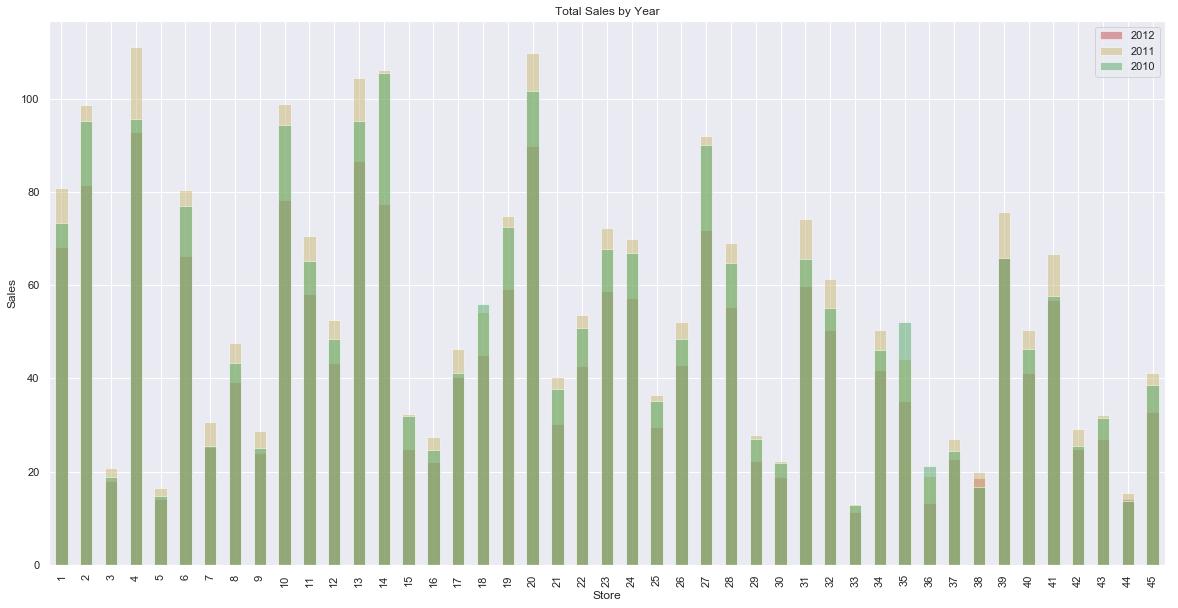

In [20]:

df_max_sales_year[2012].plot(kind='bar',stacked=True,figsize=(20, 10), alpha=0.5,color='r')

df_max_sales_year[2011].plot(kind='bar',stacked=True,figsize=(20, 10),alpha=0.5, color='y')

df_max_sales_year[2010].plot(kind='bar',stacked=True,figsize=(20, 10), alpha=0.5,color='g')

plt.title('Total Sales by Year')
plt.ylabel('Sales')
plt.xlabel('Store')
plt.legend()

plt.show()

In [21]:
#Sales by Year
pd.options.display.float_format = '{:,.2f}'.format
df_max_sales_year1=df.groupby(['Store','Year'])[['Weekly_Sales($M)']].sum().unstack().reset_index()

In [22]:
df_max_sales_year1.columns=df_max_sales_year1.columns.droplevel()

In [23]:
df_max_sales_year1.rename(columns={'':'Store'}, inplace=True)

In [24]:
df_max_sales_year1.head()

Year,Store,2010,2011,2012
0,1,73.28,80.92,68.20
1,2,95.28,98.61,81.50
2,3,18.75,20.82,18.02
3,4,95.68,111.09,92.77
4,5,14.84,16.47,14.17


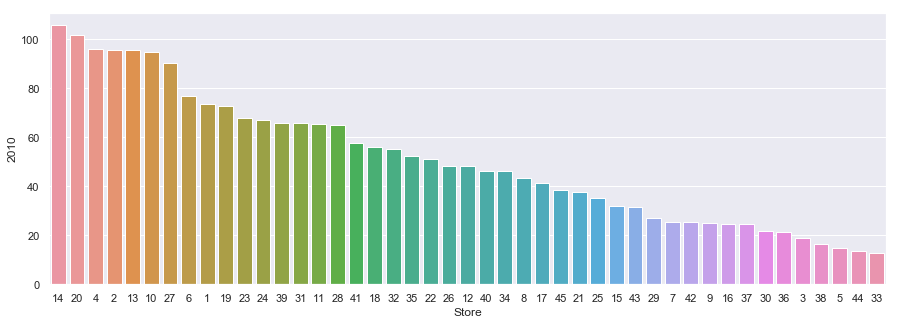

In [25]:
df_2010=df_max_sales_year1[['Store',2010]].sort_values(2010, ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y=2010, data =df_2010,
    order=df_2010.sort_values(2010,ascending = False).Store)
plt.show()

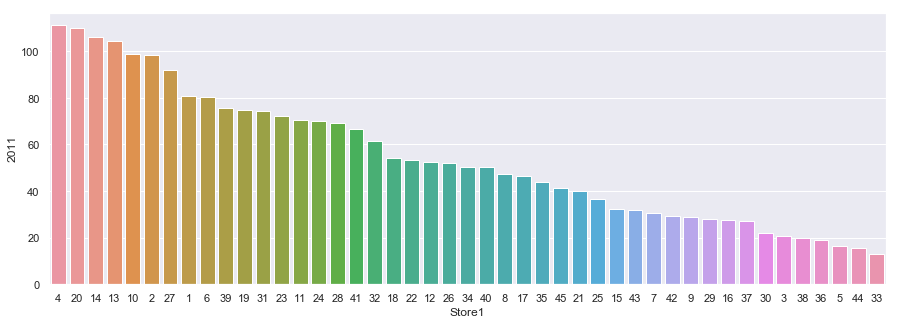

In [26]:
df_2011=df_max_sales_year1[['Store',2011]].sort_values(2011, ascending=False)
df_2011.rename(columns={'Store':'Store1'}, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x='Store1',y=2011, data =df_2011,
    order=df_2011.sort_values(2011,ascending = False).Store1)
plt.show()

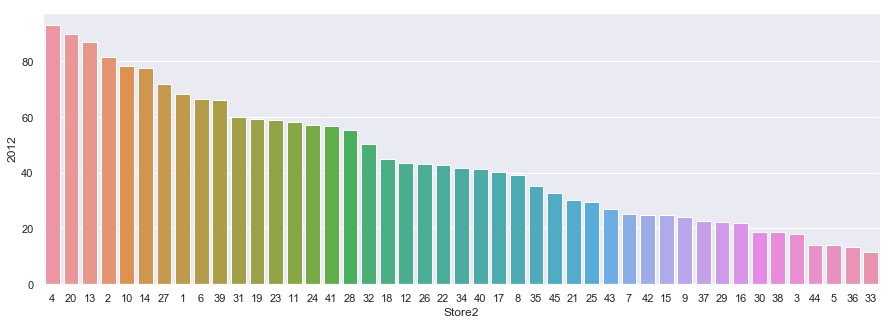

In [27]:
df_2012=df_max_sales_year1[['Store',2012]].sort_values(2012, ascending=False)
df_2012.rename(columns={'Store':'Store2'}, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x='Store2',y=2012, data =df_2012,
    order=df_2012.sort_values(2012,ascending = False).Store2)
plt.show()

### Observations:
    * if we look at the overall average sales across all yearss,  Store No. 20 has the maximum average Sales 
    * When we look at the Total sales by each Year, we again see, store, no 20 falls in the top 2 position
    * it appears we do not have the Nov and Dec sales data for 2012 and its reflecting in the total sales values for the 2012

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [28]:
df_std = df.groupby('Store').agg({'Weekly_Sales($M)':'std'})

In [29]:
df_std[df_std['Weekly_Sales($M)']==df_std['Weekly_Sales($M)'].max()]

,Weekly_Sales($M)
Store,
14,0.32


C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of Store # 14')

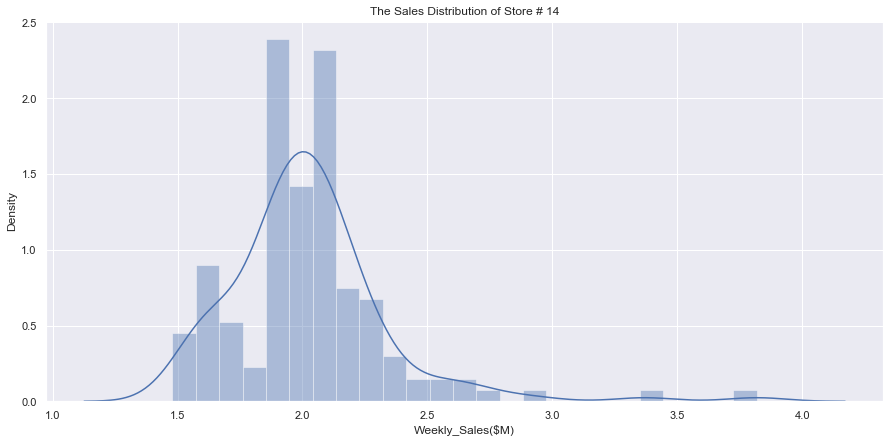

In [30]:
#Distribution of sales for Store number 14
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store']==14]['Weekly_Sales($M)'])
plt.title('The Sales Distribution of Store # 14')

### Observations:
    * store number 14 has the maximum standard deviation  0.32 $M

In [31]:
#coefficient of mean to standard deviation
df_coeff_std =df.groupby('Store').agg({'Weekly_Sales':['mean','std']})
#df_coeff_std['Weekly_Sales']['mean']
#df_coeff_std.reset_index(inplace=True)
df_coeff_std['Coefficient of mean to standard deviation']= df_coeff_std['Weekly_Sales']['std']/df_coeff_std['Weekly_Sales']['mean']
#df_coeff_std[df_coeff_std['Coefficient of mean to standard deviation']==df_coeff_std['Coefficient of mean to standard deviation'].max()]


df_coeff_std.sort_values('Coefficient of mean to standard deviation', ascending=False)

Weekly_Sales            Coefficient of mean to standard deviation
              mean        std                                          
Store                                                                  
35      919,724.98 211,243.46                                      0.23
7       570,617.31 112,585.47                                      0.20
15      623,312.47 120,538.65                                      0.19
29      539,451.43  99,120.14                                      0.18
23    1,389,864.46 249,788.04                                      0.18
21      756,069.08 128,752.81                                      0.17
45      785,981.41 130,168.53                                      0.17
16      519,247.73  85,769.68                                      0.17
18    1,084,718.42 176,641.51                                      0.16
36      373,511.99  60,725.17                                      0.16
25      706,721.53 112,976.79                                      0.16
10    1,899,424.57 302,262.06                                      0.16
14    2,020,978.40 317,569.95                                      0.16
22    1,028,501.04 161,251.35                                      0.16
39    1,450,668.13 217,466.45                                      0.15
41    1,268,125.42 187,907.16                                      0.15
12    1,009,001.61 139,166.87                                      0.14
28    1,323,522.24 181,758.97                                      0.14
6     1,564,728.19 212,525.86                                      0.14
27    1,775,216.20 239,930.14                                      0.14
19    1,444,999.04 191,722.64                                      0.13
13    2,003,620.31 265,507.00                                      0.13
20    2,107,676.87 275,900.56                                      0.13
4     2,094,712.96 266,201.44                                      0.13
9       543,980.55  69,028.67                                      0.13
17      893,581.39 112,162.94                                      0.13
24    1,356,755.39 167,745.68                                      0.12
40      964,128.04 119,002.11                                      0.12
2     1,925,751.34 237,683.69                                      0.12
11    1,356,383.12 165,833.89                                      0.12
5       318,011.81  37,737.97                                      0.12
32    1,166,568.15 138,017.25                                      0.12
8       908,749.52 106,280.83                                      0.12
3       402,704.44  46,319.63                                      0.12
38      385,731.65  42,768.17                                      0.11
26    1,002,911.84 110,431.29                                      0.11
34      966,781.56 104,630.16                                      0.11
1     1,555,264.40 155,980.77                                      0.10
33      259,861.69  24,132.93                                      0.09
42      556,403.86  50,262.93                                      0.09
31    1,395,901.44 125,855.94                                      0.09
44      302,748.87  24,762.83                                      0.08
43      633,324.72  40,598.41                                      0.06
30      438,579.62  22,809.67                                      0.05
37      518,900.28  21,837.46                                      0.04

### Observations:
    * store number 35 has the maximum Coefficient of mean to standard deviation : 0.23

# Which store/s has good quarterly growth rate in Q3’2012

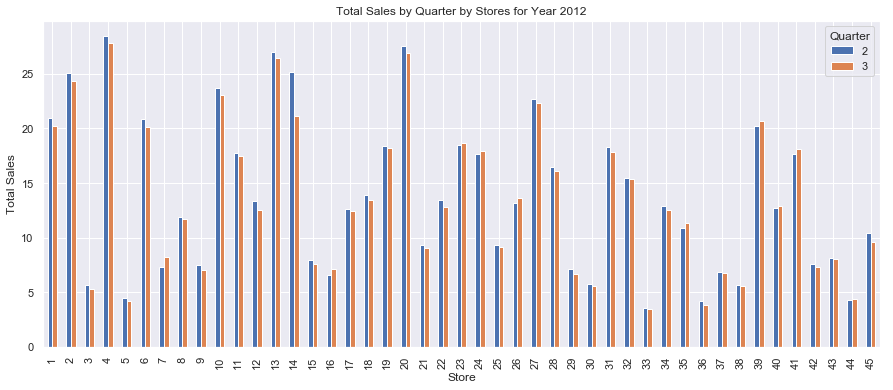

In [32]:
df_Quarter =df.groupby(['Year','Quarter','Store'])[['Weekly_Sales($M)']].sum().reset_index()

df_pvt=pd.pivot_table(df_Quarter[df_Quarter['Year']==2012], values='Weekly_Sales($M)', index='Store',columns=['Quarter'])
df_pvt
df_pvt[[2,3]].plot(kind='bar',figsize=(15,6))
plt.title('Total Sales by Quarter by Stores for Year 2012')
plt.ylabel('Total Sales')
plt.show()

In [33]:
df_Q32012 = df[(df['Year']==2012) & (df['Quarter']==3)]
df_Q32012_max=df_Q32012.groupby('Store').agg({'Weekly_Sales':['sum']})
df_Q32012_max[df_Q32012_max['Weekly_Sales']['sum']==df_Q32012_max['Weekly_Sales']['sum'].max()]

,Weekly_Sales
,sum
Store,
4,"27,796,792.46"


In [34]:
#top 10 total sales by store for 2012 3rd Quarter
df_Q32012.groupby('Store')[['Weekly_Sales']].sum().sort_values('Weekly_Sales',ascending=False).head(10)

,Weekly_Sales
Store,
4,"27,796,792.46"
20,"26,891,526.98"
13,"26,421,259.30"
2,"24,303,354.86"
10,"23,037,258.76"
27,"22,307,711.41"
14,"21,187,560.65"
39,"20,715,116.23"
1,"20,253,947.78"


### Observations:¶

* Store Number 4 has Good Quartely Growth in Q3'2012:    27,796,792.46 compared to other Stores
* Store no 20 is 2nd in the list with good quaterly growth: 26,891,526.98

# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [35]:
df_Holiday = df[df['Holiday_Flag']==1]
df_Non_Holiday = df[df['Holiday_Flag']==0]

In [36]:
df_Holiday.groupby(['Holiday_category'])[['Weekly_Sales($M)']].mean().reset_index()

,Holiday_category,Weekly_Sales($M)
0,Christmas,0.96
1,Labour Day,1.04
2,Super Bowl,1.08
3,Thanksgiving,1.47


In [37]:
df_Non_Holiday.groupby(['Holiday_category'])[['Weekly_Sales($M)']].mean().reset_index()

,Holiday_category,Weekly_Sales($M)
0,Non Holiday Week,1.04


### Observations:

    * Thanksgiving holiday season has higher sales than the mean sales in non-holiday season for all stores together

In [38]:
#df_Holiday.groupby(['Holiday_category'])[['Weekly_Sales($M)']].mean().reset_index().plot(kind='line', x='Holiday_category')

In [39]:
df_sales =df.groupby('date')[['Weekly_Sales($M)']].mean().reset_index()
df_sales.head()

,date,Weekly_Sales($M)
0,2010-02-05,1.11
1,2010-02-12,1.07
2,2010-02-19,1.07
3,2010-02-26,0.98
4,2010-03-05,1.04


<function matplotlib.pyplot.show(*args, **kw)>

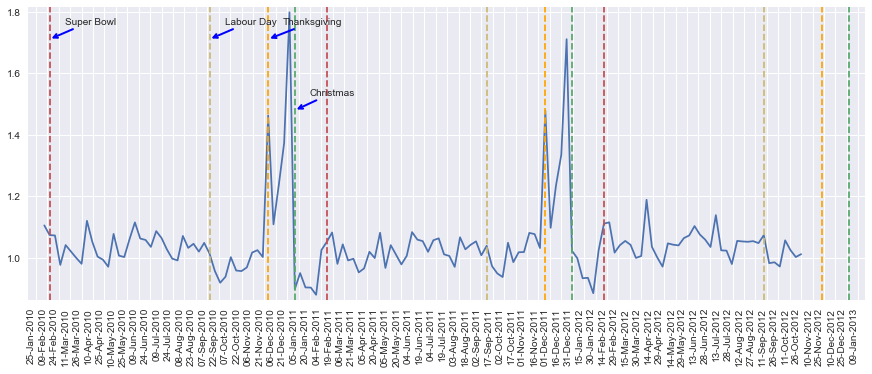

In [40]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize = (15,6)) 


ax.plot(df_sales['date'],df_sales['Weekly_Sales($M)'])
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%b-%Y'))
plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=15))

plt.margins(0.02)

#super Bowl
ax.annotate('Super Bowl', (pd.to_datetime('12-2-2010',format='%d-%m-%Y'), df_sales['Weekly_Sales($M)'][98]), xytext=(15, 15),
   textcoords='offset points', arrowprops=dict(arrowstyle='->',color='blue', lw=2))
fig.autofmt_xdate()


plt.axvline(x = pd.to_datetime('12-2-2010',format='%d-%m-%Y'), color = 'r', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('11-2-2011',format='%d-%m-%Y'), color = 'r', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('10-2-2012',format='%d-%m-%Y'), color = 'r', label = 'axvline - full height',linestyle='--')

#Labour Day
ax.annotate('Labour Day', (pd.to_datetime('10-9-2010',format='%d-%m-%Y'), df_sales['Weekly_Sales($M)'][98]), xytext=(15, 15),
   textcoords='offset points', arrowprops=dict(arrowstyle='->',color='blue', lw=2))
fig.autofmt_xdate()

plt.axvline(x = pd.to_datetime('10-9-2010',format='%d-%m-%Y'), color = 'y', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('9-9-2011',format='%d-%m-%Y'), color = 'y', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('7-9-2012',format='%d-%m-%Y'), color = 'y', label = 'axvline - full height',linestyle='--')

#Thanksgiving
ax.annotate('Thanksgiving', (pd.to_datetime('26-11-2010',format='%d-%m-%Y'), df_sales['Weekly_Sales($M)'][98]), xytext=(15, 15),
   textcoords='offset points', arrowprops=dict(arrowstyle='->',color='blue', lw=2))
fig.autofmt_xdate()

plt.axvline(x = pd.to_datetime('26-11-2010',format='%d-%m-%Y'), color = 'orange', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('25-11-2011',format='%d-%m-%Y'), color = 'orange', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('23-11-2012',format='%d-%m-%Y'), color = 'orange', label = 'axvline - full height',linestyle='--')

#Christmas
ax.annotate('Christmas', (pd.to_datetime('31-12-2010',format='%d-%m-%Y'), df_sales['Weekly_Sales($M)'][94]), xytext=(15, 15),
   textcoords='offset points', arrowprops=dict(arrowstyle='->',color='blue', lw=2))
fig.autofmt_xdate()

plt.axvline(x = pd.to_datetime('31-12-2010',format='%d-%m-%Y'), color = 'g', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('30-12-2011',format='%d-%m-%Y'), color = 'g', label = 'axvline - full height',linestyle='--')
plt.axvline(x = pd.to_datetime('28-12-2012',format='%d-%m-%Y'), color = 'g', label = 'axvline - full height',linestyle='--')

plt.xticks(rotation=90)
plt.show

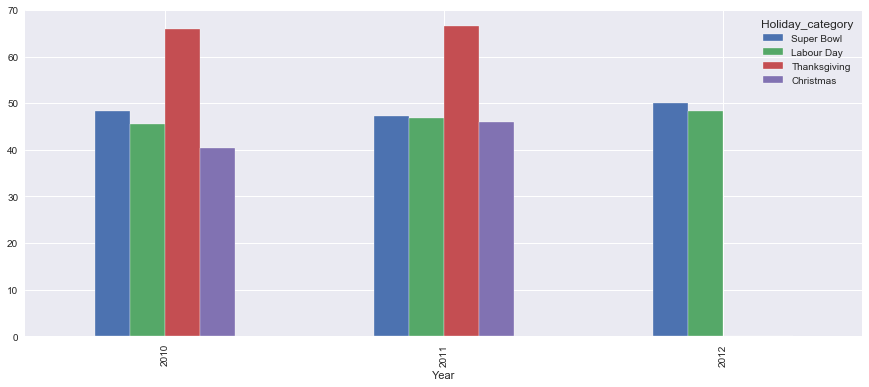

In [41]:
# Sales by Year and holiday category


df_year_sales=df.groupby(['Year','Holiday_category'])[['Weekly_Sales($M)']].sum().unstack().reset_index()

df_year_sales.columns=df_year_sales.columns.droplevel()

df_year_sales.rename(columns={'':'Year'},inplace=True)

#plotting

df_year_sales[['Year','Super Bowl','Labour Day','Thanksgiving','Christmas']].plot(kind='bar', x='Year',figsize=(15,6))
plt.show()

### Observations:

    * The sales increased during thanksgiving. And the sales decreased during christmas.
    * No sales data for 2012 for Thanksgiving and Christmas in the given dataset

# Provide a monthly and semester view of sales in units and give insights

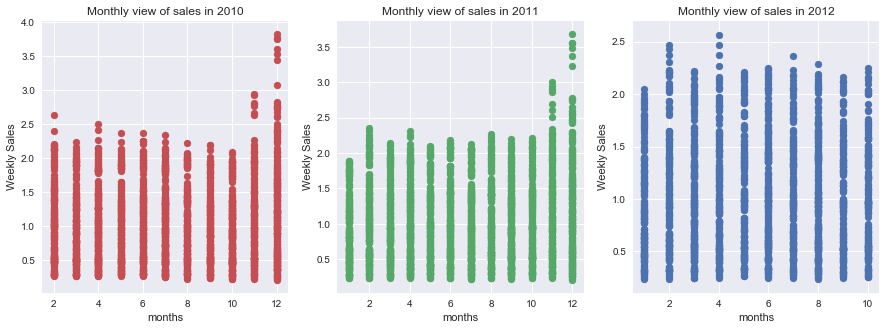

In [42]:
# Monthly view of sales for each years
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales($M)"], color='r')
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")


plt.subplot(1, 3, 2)

plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales($M)"],color='g')
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")


plt.subplot(1, 3, 3)

plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales($M)"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")

plt.show()

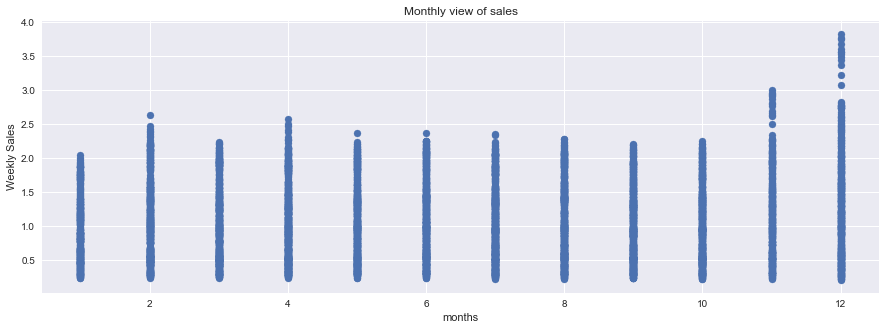

In [43]:
# Monthly view of sales for each years
plt.figure(figsize=(15, 5))
plt.scatter(df["Month"],df["Weekly_Sales($M)"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

plt.show()

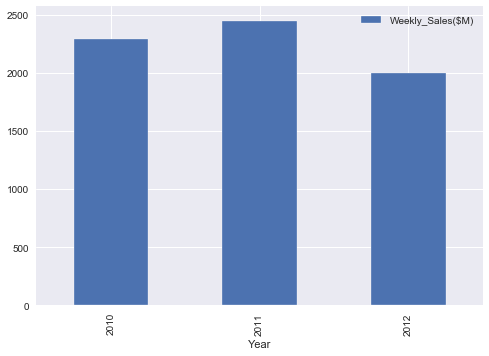

In [44]:
df.groupby(['Year'])[['Weekly_Sales($M)']].sum().plot(kind='bar')

# Change dates into days by creating new variable.

In [45]:
df["Day"]= pd.DatetimeIndex(df['date']).day

In [46]:
df_modelling = df[['Store','date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Year','Month','Day']]
df_modelling.head()

,Store,date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,2,5
1,1,2010-02-12,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,2,12
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,2010,2,19
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,2010,2,26
4,1,2010-03-05,"1,554,806.68",0,46.50,2.62,211.35,8.11,2010,3,5


# Modelling and Forecasting Sales

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar

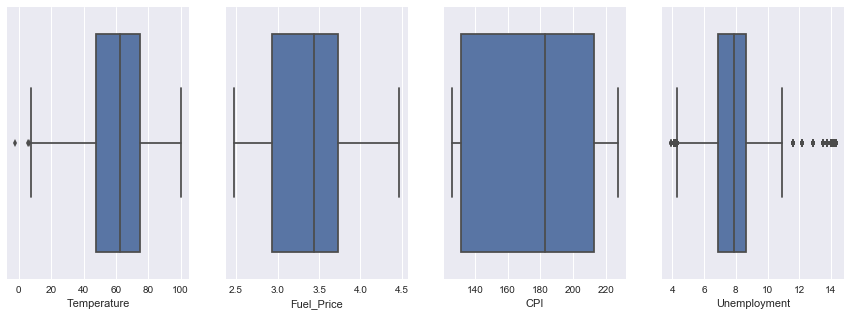

In [51]:

#checking outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(df_modelling['Temperature'])

plt.subplot(1, 4, 2)
sns.boxplot(df_modelling['Fuel_Price'])

plt.subplot(1, 4, 3)
sns.boxplot(df_modelling['CPI'])

plt.subplot(1, 4, 4)
sns.boxplot(df_modelling['Unemployment'])

plt.show()

In [52]:
df_modelling['Temperature'].describe()

count   6,435.00
mean       60.66
std        18.44
min        -2.06
25%        47.46
50%        62.67
75%        74.94
max       100.14
Name: Temperature, dtype: float64

In [53]:
df_modelling['Unemployment'].describe()

count   6,435.00
mean        8.00
std         1.88
min         3.88
25%         6.89
50%         7.87
75%         8.62
max        14.31
Name: Unemployment, dtype: float64

### Observations:
    * we see there are few ouliers in Temperature (<10) and Unemployment (<4.5 and >10)
    

In [55]:
# dropping rows where Temperature (<10) and Unemployment (<4.5 and >10)

df_modelling_new = df_modelling[(df_modelling['Unemployment']<10) & (df_modelling['Unemployment']>4.5) & (df_modelling['Temperature']>10)]

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SujitSonar

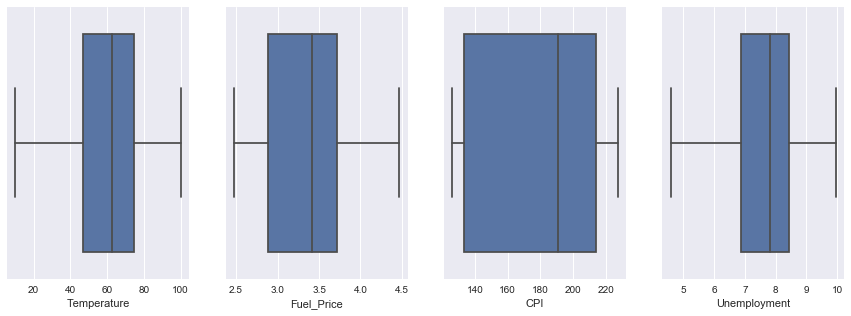

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(df_modelling_new['Temperature'])

plt.subplot(1, 4, 2)
sns.boxplot(df_modelling_new['Fuel_Price'])

plt.subplot(1, 4, 3)
sns.boxplot(df_modelling_new['CPI'])

plt.subplot(1, 4, 4)
sns.boxplot(df_modelling_new['Unemployment'])


# Building a Model

In [58]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [59]:
df_modelling_new.head(2)

,Store,date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,"1,643,690.90",0,42.31,2.57,211.10,8.11,2010,2,5
1,1,2010-02-12,"1,641,957.44",1,38.51,2.55,211.24,8.11,2010,2,12


In [66]:
df_modelling_new[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Day','Month','Year']].corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Weekly_Sales,1.00,-0.06,0.00,-0.09,-0.01,-0.02,0.08,-0.05
Temperature,-0.06,1.00,0.13,0.23,-0.00,0.03,0.24,0.07
Fuel_Price,0.00,0.13,1.00,-0.14,-0.12,0.03,-0.04,0.78
CPI,-0.09,0.23,-0.14,1.00,-0.21,0.00,0.01,0.09
Unemployment,-0.01,-0.00,-0.12,-0.21,1.00,-0.00,-0.02,-0.27
Day,-0.02,0.03,0.03,0.00,-0.00,1.00,0.01,0.01
Month,0.08,0.24,-0.04,0.01,-0.02,0.01,1.00,-0.19
Year,-0.05,0.07,0.78,0.09,-0.27,0.01,-0.19,1.00


### Observations:
    * we see Fuel price does not have any corelation with Weekly sales
    * Month has some corelation and perhaps this is due to holiday seasons in certain months of the year
    * Other featues seems to be very negatively corelated but then ,Corelations does not give us much information

In [67]:
# Select features and target 
X = df_modelling_new[['Store','Temperature','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df_modelling_new['Weekly_Sales']

# Split data to train and test (0.70:0.30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


Linear Regression:

Accuracy: 13.412820643570633
Mean Absolute Error: 456155.73393569974
Mean Squared Error: 301682244459.7772
Root Mean Squared Error: 549256.0827699382


C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


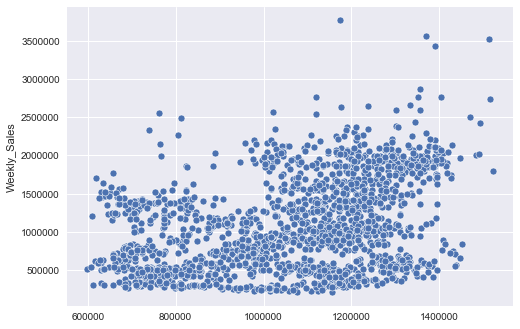

In [68]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

### Observations:
* Accuracy is very small with Linear Regression model, aound 13%

Random Forest Regressor:

Accuracy: 95.55558116088143
Mean Absolute Error: 60791.15738384984
Mean Squared Error: 15407599735.024164
Root Mean Squared Error: 124127.35288816951


C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


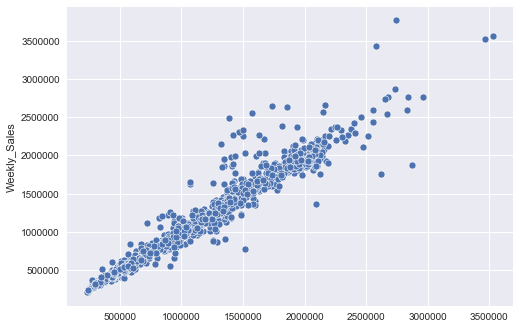

In [69]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

In [89]:
s1 = pd.DataFrame(y_pred[0:10],y_test.values[0:10]).reset_index()
names =['y_test','y_pred']
s1.columns = names
s1

,y_test,y_pred
0,"1,999,794.26","2,093,792.16"
1,"1,882,070.88","1,997,338.28"
2,"1,605,491.78","1,544,298.32"
3,"1,397,970.54","1,372,428.63"
4,"479,263.15","516,139.10"
5,"276,157.80","283,865.73"
6,"597,406.39","603,771.81"
7,"733,037.32","751,133.00"
8,"583,079.97","574,376.85"
9,"1,306,644.25","1,342,381.42"


### Observations:

    * Random Forest regressor model has a much better accuracy: around 96%